In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import naive_bayes, model_selection, metrics
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances

In [2]:
# This cell is for single view

data_set = pd.read_csv('D:/Datasets/Diabetes_Dataset.csv', header = None)
data_set.columns = ['Pregnant','Plasma_Glucose','DBP','Thickness','Insulin','BMI','Pedigree','Age','Class']
X = data_set.loc[:,data_set.columns != 'Class']
y = data_set['Class']




In [3]:
V1_cols = ['Pregnant','Pedigree','Age','Plasma_Glucose','Thickness']
V2_cols = ['DBP','BMI','Insulin']


V1 = X[V1_cols] #First View
V2 = X[V2_cols]  #Second View



In [4]:
Views[1].shape

NameError: name 'Views' is not defined

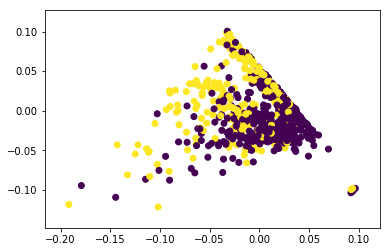

In [8]:
from multiview import cpcmv as cpcmv

#Classical MDS


Views = [V1,V2]


mat = np.ones(shape = (2,len(V1),len(V1)))
mat_abr = np.ones(shape = (2,len(V1),len(V1)))

for i in range(len(Views)):
    view = euclidean_distances(Views[i])
    view_up = np.power(np.array(view),2)
    view_squared = view_up
    rmean = np.mean(view_up,axis = 1)
    cmean = np.mean(view_up,axis = 0)
    mean = np.mean(view_up)
    
    view_up = view_up + mean
    view_up.T[:,] -= rmean[:]
    view_up = -1 * (view_up - cmean)/2
    mat[i] = -view_up/2
    
    J = np.eye(len(view)) - (1/len(view))*np.ones(view.shape) #centering matrix

    B = -(1/2) * np.matmul(np.matmul(J,view_squared),J)   #construct B matrix from the 
    mat_abr[i] = B

    
fit = cpcmv.MVCPC(k = 4).fit_transform(mat_abr)

components = [fit[1],mat_abr]

'''
The code above references classical MVMDS. This is for euclidean distances.
It works very well for non-complex differences if there is some sort of linear
relationship. The cpcmv is inspired by Dr. Trendafilov. This is a step-wise method This gives us the
common principal components.
'''


    
plt.scatter(components[0][:,0],components[0][:,1],c = y)



In [9]:
components[0].shape

(768, 4)

In [10]:
mat_abr.shape

(2, 768, 768)

In [11]:
#make into a function. Takes in a list of the matrices. 

def Classical_MDS(num_views,Views,k_comp):
    
    mat = np.ones(shape = (num_views,len(Views[0]),len(Views[0])))
    mat_abr = np.ones(shape = (num_views,len(Views[0]),len(Views[0])))

    
    for i in range(len(Views)):
        view = euclidean_distances(Views[i])
        view_up = np.power(np.array(view),2)
        rmean = np.mean(view_up,axis = 1)
        cmean = np.mean(view_up,axis = 0)
        mean = np.mean(view_up)
    
        view_up = view_up + mean
        view_up.T[:,] -= rmean[:]
        view_up = view_up - cmean
        mat[i] = -view_up/2
        
        J = np.eye(len(view)) - (1/len(view))*np.ones(view.shape) #centering matrix
        B = -(1/2) * np.matmul(np.matmul(view,view_up),J)   #construct B matrix from the 
        mat_abr[i] = B
    

    
    fit = cpcmv.MVCPC(k = k_comp).fit_transform(mat)
    
    components = fit[1]

    
    return components

Text(0.5, 1.0, 'Euclidean Multiview Classical MDS (2 Views)')

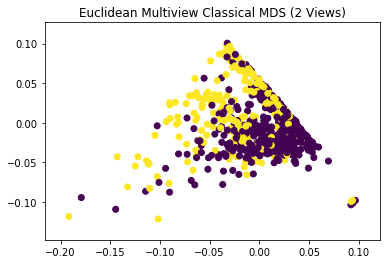

In [12]:
components = Classical_MDS(2,Views,4)

plt.scatter(components[:,0],components[:,1],c = y)
plt.title('Euclidean Multiview Classical MDS (2 Views)')


In [14]:
import sys
sys.path.append("..")

from datasets.base import load_UCImultifeature

data = load_UCImultifeature()

In [15]:
Views = data[0]
Classes = data[1]


In [32]:
j = Classical_MDS(6,Views,5)

In [34]:
#fin = pd.DataFrame(j,columns=['C1','C2','C3'])
#fin['Class'] = Classes

Text(0, 0.5, '3rd Component')

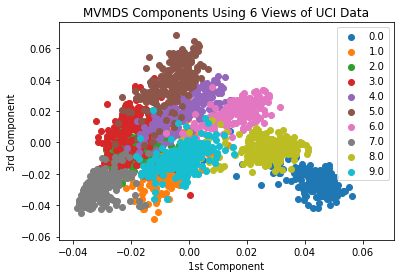

In [40]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
for g in np.unique(Classes):
    ix = np.where(Classes == g)
    ax.scatter(j[:,0][ix],j[:,2][ix],label = g)
ax.legend()
plt.title('MVMDS Components Using 6 Views of UCI Data')
plt.xlabel('1st Component')
plt.ylabel('3rd Component')


In [41]:
from sklearn.decomposition import PCA

stuff = Views[0]

pca = PCA(n_components=5)
pca.fit(stuff)
urp = pca.fit_transform(stuff)

Text(0, 0.5, '3rd Component')

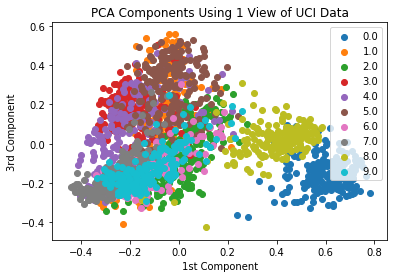

In [42]:
fig,ax = plt.subplots()
for g in np.unique(Classes):
    ix = np.where(Classes == g)
    ax.scatter(urp[:,0][ix],urp[:,2][ix],label = g)
ax.legend()
plt.title('PCA Components Using 1 View of UCI Data')
plt.xlabel('1st Component')
plt.ylabel('3rd Component')